In [9]:
#!pip install --upgrade pandas
#pd.__version__

In [10]:
import os

In [11]:
os.version

AttributeError: module 'os' has no attribute 'version'

In [12]:
os.getcwd()

'D:\\Mallikarjun\\UPXAcademylearning\\Jupyter\\DataScience\\EDA\\HealthCareAnalytics'

In [13]:
# incase to set the ppath
#path=''
#os.chdir(path)

#### what are the goals

### Import all the scientific and visualization packages

#### Which packages would you use for EDA
#### which Data visualization packages would you use¶

In [14]:
import pandas as pd # for data manipulation
import numpy as np # for numerical calculation and array computations
import seaborn as sns # data visualizations, can create better visualizations
from matplotlib import pyplot # data visualizations, can create basic visualizations

#### which ML packages would you use

In [15]:
# for logistic regression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression 

#For evaluatiing the models
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
%matplotlib inline


D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load the data

In [16]:
dataframe=pd.read_csv("framingham.csv")

### Understand the features and datatypes in the dataset

In [17]:
print (list(dataframe.head(0)))

['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


#### What the variable types

In [18]:
dataframe.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

#### Get a number of records in each variable

In [19]:
dataframe.count()

male               4240
age                4240
education          4135
currentSmoker      4240
cigsPerDay         4211
BPMeds             4187
prevalentStroke    4240
prevalentHyp       4240
diabetes           4240
totChol            4190
sysBP              4240
diaBP              4240
BMI                4221
heartRate          4239
glucose            3852
TenYearCHD         4240
dtype: int64

In [20]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


### which variables are considered as risk factors

In [21]:
#currentSmoker, 
# cigsPerDay   ,
# diabetes, 
# totChol    
# sysBP      
# heartRate     
# age 
# male 
# BPmeds 
# prevalent 
# stroke
# prevalent 
# HYP 
#diaBP                    

In [22]:
# current smoker and cigsPerday are related. 
# age and education are co-related
# high bp and diabetes
# sysBP and  diaBP
# 

# Since we assume they are colrelated or assocaiated and hence we can do a co-relation plot, heat map
# if the co-orelation value is close to 1 , then they are close related
# we can then drop some features , 
# co-relation heat map is used to do feature selection based on they influence the outcome variable.Keep the most important ones
# variables that have corelation>0.5 have good association

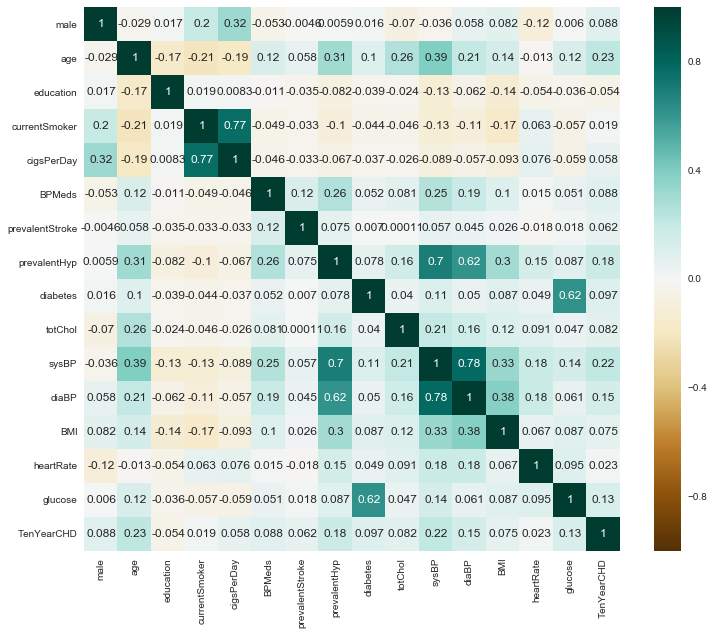

In [23]:
corr = dataframe.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.0)
sns.heatmap(corr,cmap="BrBG", xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)


In [24]:
# Summary of the co-relation
# currentSmoker and cigsPerDay
# sysBP and prevalentHyp
# diaBP and prevalentHyp
# diabetes and glucose

### Data Cleaning

#### How null values are there for each variable

In [25]:
dataframe.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [26]:
#education has many missing values. Can it be dropped. 
#We do not know. 
#We need to check what is the influence of education on the outcome
#education has a corr of 0.052 with TotalYearCHD. So there is very less influence

In [27]:
#Also check if there are any variables which have very high missing values. 
# Let keep a threhold of 90%. variables missing 90% values can be dropped
#check how many variables are there, how many observations are there
#Based on the influence we can drop them as there is value in impuuting thsi variable

##### check variables having 90% missing values and drop them 

In [28]:
threshhold=len(dataframe)*.1
#axis=1 referes to column
dataframe.dropna(thresh=threshhold,axis=1,inplace=True)

In [29]:
dataframe.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [30]:
## There are no variables that are having 90% missing values
# so go ahead with imputation

### Data imputation

##### We will apply median imputation as the mean can be skewness, you can check the histogram

In [31]:
# Mean imputation will skew the data and cause a bais
# imputing the mean preserves the mean of the observed data
#  Mean imputation does not preserve the relationships among variables.
#Often missing value in the data means that the value should be zero (or something else as default)
#t will bias your standard error, 
# . Model-based imputations are demonstrably superior and less biasing than any automated approach
#https://en.wikipedia.org/wiki/Imputation_(statistics)
#https://en.wikipedia.org/wiki/Missing_data

In [32]:
#Imputation is a means to a goal, not the goal in itself. 
#In some circumstances, replacing missing data might be the wrong thing to do.
# Make sure that you first pay attention to why your data are missing, as explained for example in the Missing data
#Wikipedia page,
#and that imputation is actually appropriate for answering the question your project seeks to answer.
#If some assumptions are met (for example, if the probability of a variable having a missing value does not depend on the 
#value itself, technically called "missing at random") 
#and your study involves multiple variables, you might be better off using multiple imputation rather than replacements by means or medians. 
#In multiple imputation, known values of all variables are used to provide several sets of estimates of the missing data. 
#This approach can provide better estimates both of the underlying relations among the variables and of the reliability
#of your estimates. 
#See questions on this site having the multiple-imputation tag for more information.

In [33]:
#try both of them and check how it influence the outcome result. –

##### function for imputating with median

In [34]:
def impute_median(series):
    return series.fillna(series.median())

In [35]:

dataframe.education=dataframe['education'].transform(impute_median)
dataframe.BMI=dataframe['BMI'].transform(impute_median)
dataframe.BPMeds =dataframe['BPMeds'].transform(impute_median)
dataframe.totChol=dataframe['totChol'].transform(impute_median)
dataframe.BMI=dataframe['BMI'].transform(impute_median)
dataframe.heartRate =dataframe['heartRate'].transform(impute_median)
dataframe.glucose=dataframe['glucose'].transform(impute_median)
dataframe.cigsPerDay =dataframe['cigsPerDay'].transform(impute_median)

In [36]:
dataframe.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## understand the data statistics

In [37]:
dataframe.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799005,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070775,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Data visualization

D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


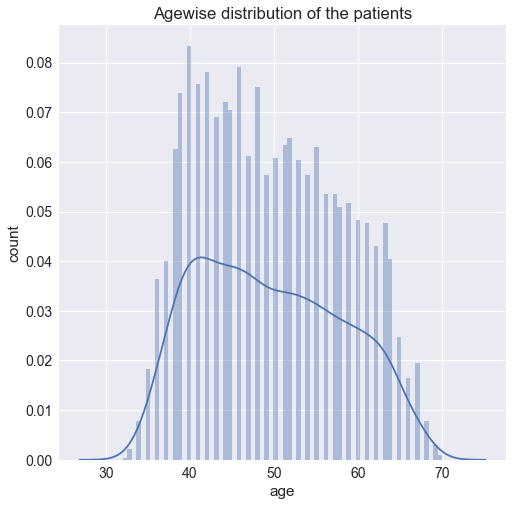

In [38]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.distplot(dataframe['age'], hist=True,bins=70, kde=True)
plt.ylabel('count')
plt.title('Agewise distribution of the patients')

D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


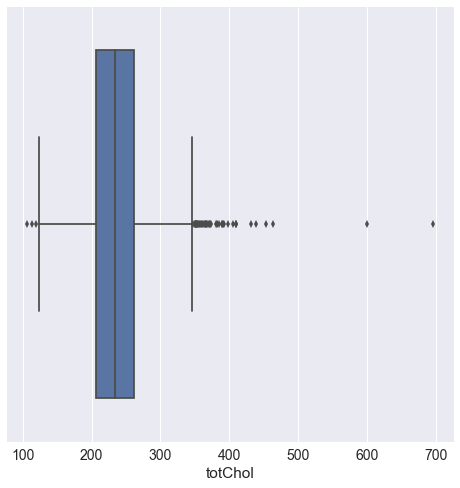

In [39]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.boxplot(x="totChol",data=dataframe)
#sns.boxplot(y='BMI',x='age',hue='male',data=dataframe,linewidth=2.5)



### Identify the count of patients who are at more risk CHD

D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


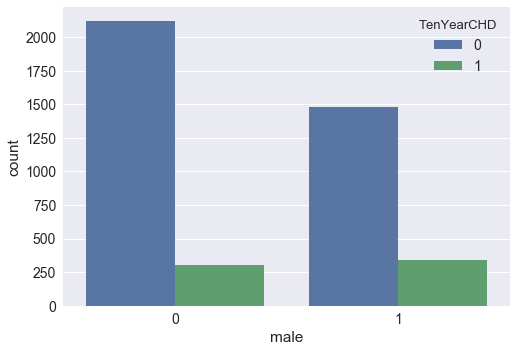

In [54]:
 # number of female and mailes in the dataset. Verify this in excel
sns.countplot(x='male', hue='TenYearCHD', data=dataframe)

D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


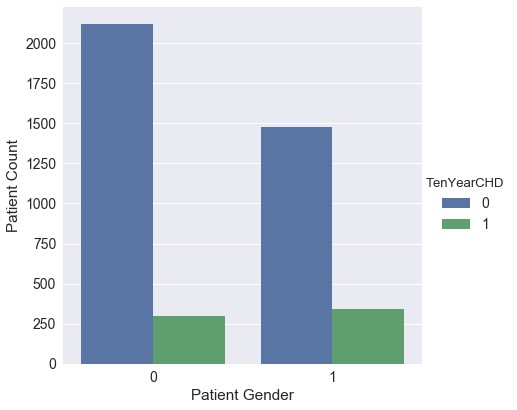

In [55]:
mx=sns.factorplot(x='male',hue='TenYearCHD',data=dataframe,kind='count',size=6)
mx.set(xlabel='Patient Gender')
mx.set(ylabel='Patient Count')

### Explain how CHD is effected by age

In [56]:
dataframe.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [57]:
# we can use histogram with bins or we can bucket the data
# We have create bin ass intervals in histogram 
# as we neeed a specific group of age, I am creating a custom function
def agetype_func(age):
    if age.item()<40:
        return 'young'
    elif age.item()>40 and age.item()<50:
        return 'middle'
    elif age.item()>50 and age.item()<60:
        return 'Post50'
    else:
        return 'Seniors'


In [58]:
dataframe['ageType']=dataframe[['age']].apply(agetype_func,axis=1)

D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


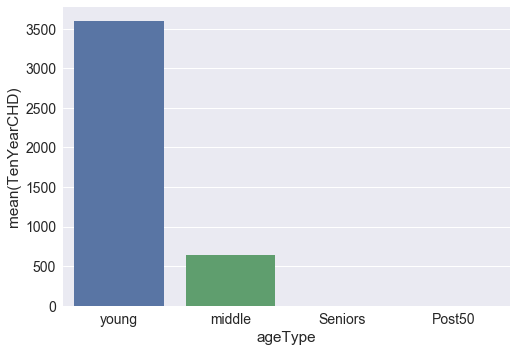

In [59]:
sns.barplot(x='ageType',y=dataframe["TenYearCHD"].value_counts(),data=dataframe)

D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


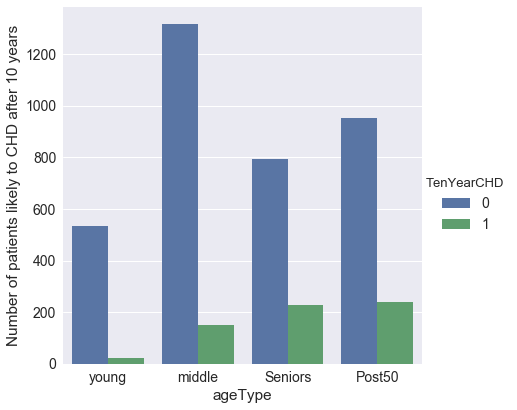

In [60]:
###
#Factor plot is not impacted by the below
#plt.figure(figsize=(20,20))
#sns.set(font_scale=1.4)
###
chart=sns.factorplot(x='ageType',hue='TenYearCHD',data=dataframe,kind='count',size=6)
chart.set(ylabel='Number of patients likely to CHD after 10 years')

D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


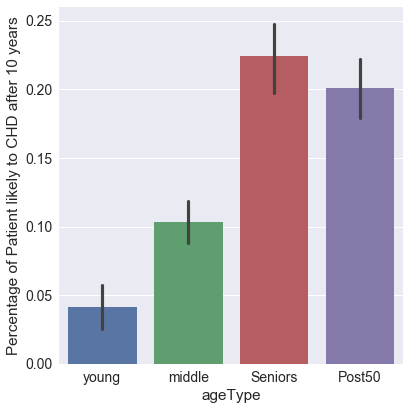

In [61]:
### group by gender instead of 
chart=sns.factorplot(x='ageType',y='TenYearCHD',data=dataframe,kind='bar',size=6)
chart.set(ylabel='Percentage of Patient likely to CHD after 10 years')

D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


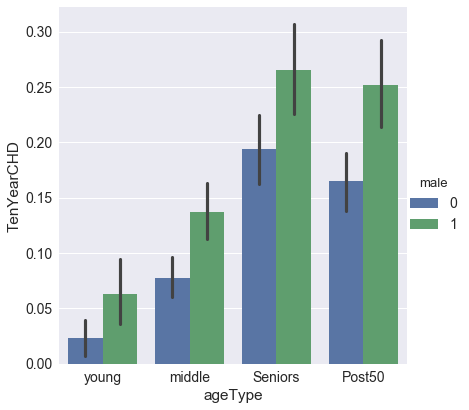

In [62]:
sns.factorplot(x='ageType',y='TenYearCHD',hue='male',data=dataframe,kind='bar',size=6,row_order=['young','middle(40 to 50)','Post 50','Seniors'])

In [63]:
## how to order the agetyoe in the order of young , middle,Post50, seniors

### Do a univariate analysis of Hearrate and glucose using Box plot

D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


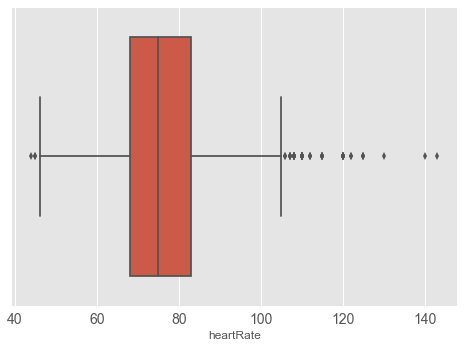

In [64]:
from matplotlib import style
style.use('ggplot')
sns.boxplot(x='heartRate',data=dataframe)

D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


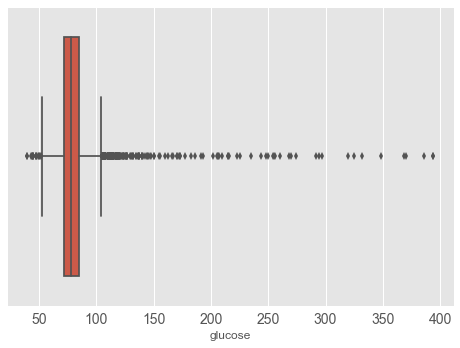

In [65]:
from matplotlib import style
style.use('ggplot')
sns.boxplot(x='glucose',data=dataframe)

### Examine the impact of prevalant stroke on daislotic blood pressure

D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\seaborn\categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


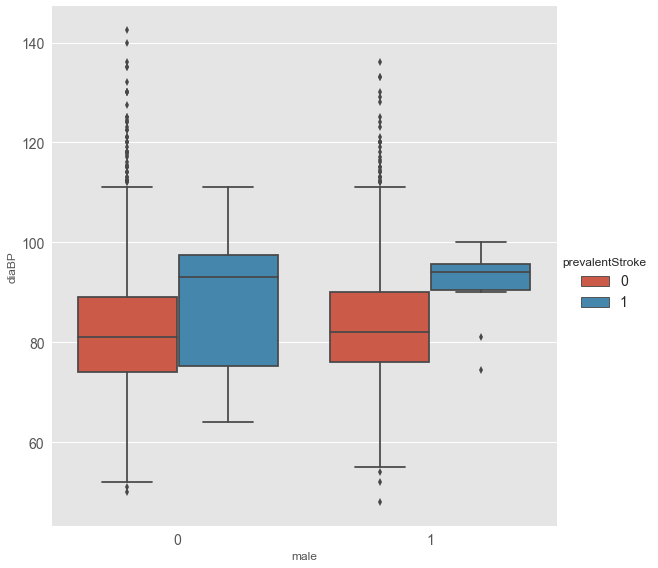

In [66]:

#sns.factorplot(x='male',hue='prevalentStroke',y='diaBP',data=dataframe,kind='bar',size=6)
sns.factorplot(x='male',hue='prevalentStroke',y='diaBP',data=dataframe,kind='box',size=8)

In [67]:
## Is the hear rate signficantly different for people with hypertension and withot hypertension

In [70]:
#def hyperten(bprate):
#   if bprate>

D:\Mallikarjun\UPXAcademylearning\Anaconda\lib\site-packages\seaborn\categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


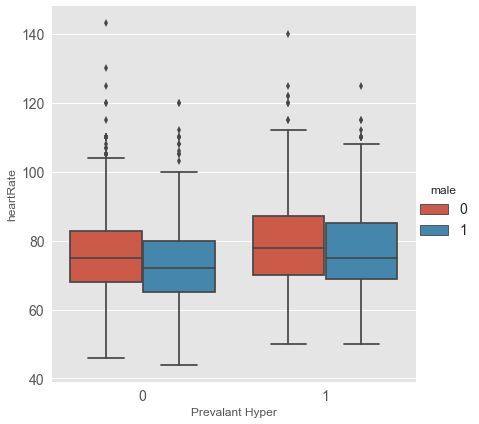

In [71]:
mx=sns.factorplot(x='prevalentHyp',y='heartRate',hue='male',data=dataframe,kind='box',size=6)
mx.set(xlabel='Prevalant Hyper')

In [72]:
#### Building a Predictive Model

In [73]:
### How would I approach a patients who has been predicted +ve for the heart disease

In [74]:
#### or who are at risk of developing  disease

In [75]:
#Proactive approach to reach out to patients allows at least 50% of the patient to go out for further screening 
#and preventive treatments

In [76]:
# In Todays study we will take 50% of the patients who we approach will go for diagnosis

In [77]:
#Proactive approach to screen customers will cost $100 on avg for each customer. 
#Marketing, prelimary screen etc..
#Post daignosis the customer spends about $10000 in the next 5 years for ttreament

In [78]:
## How many customer can we approach using the Confusion matrices

In [79]:
## what is the cost involved for approaching the customers(involves marketing and free preliminary screening of vitals)

In [80]:
## what could be the estimated revenue

In [81]:
# we will be primarly using the confusion matrix to derive this

In [83]:
# Drop the column education as it has no effect on the outpur
# Drop the column TenYearCHD as it is our outcome variable
dataframe
X=dataframe.drop(['TenYearCHD','education','ageType'],axis=1)


In [84]:
# Create our outcome variable
y=dataframe['TenYearCHD']

In [85]:
# Now split the dataset into train and test
# the test_size is usuallly 80/20 (80% train -20% test) or 70/30
# use random state to have the same dataset every timee we run
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [86]:
print ('The size of the training set 80% of X',X_train.shape)
print ('The size of the training set 80% of y',y_train.shape)

The size of the training set 80% of X (3392, 14)
The size of the training set 80% of y (3392,)


In [87]:
print ('The size of the Test set which is 20% of X',X_test.shape)
print ('The size of the Test set 20% of y',y_test.shape)
X_train.head(2)

The size of the Test set which is 20% of X (848, 14)
The size of the Test set 20% of y (848,)


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2224,0,38,1,10.0,0.0,0,0,0,309.0,113.0,68.0,21.35,60.0,75.0
3787,0,49,0,0.0,0.0,0,0,0,203.0,125.0,70.0,22.52,72.0,78.0


In [88]:
# Create a logistic regression model using a cost functionc
logreg=LogisticRegression(C=0.8)
# fit the model to the train dataset
logreg.fit(X_train,y_train)

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
#make a class predictions for test set
y_pred_class=logreg.predict(X_test)
#calculate the accuracy of the results to within 50%
print (metrics.accuracy_score(y_test,y_pred_class))
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred_class)))

0.8655660377358491
0.36665237250582594


In [97]:
y_test.value_counts()

0    729
1    119
Name: TenYearCHD, dtype: int64

In [108]:
y_test.value_counts().head(1)/len(y_test)

0    0.85967
Name: TenYearCHD, dtype: float64

In [ ]:
The null accuracy is 85.59 and model accuracy is 86.55/ So the accuracy is a bit better than the baseline model or mean.
and iss not  that great